In [1]:
!nvidia-smi

Mon May 15 15:27:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content

/content


In [4]:
!rm -rf Dataset
!rm -rf Images
!rm -rf Annotations

!mkdir Dataset
!mkdir Dataset/train
!mkdir Dataset/val
!mkdir Dataset/test
!mkdir Dataset/train/images
!mkdir Dataset/train/labels
!mkdir Dataset/val/images
!mkdir Dataset/val/labels
!mkdir Dataset/test/images
!mkdir Dataset/test/labels

!mkdir Images
!mkdir Annotations

!cp /content/drive/MyDrive/main_data_020223/resized_images\(512X512\)/* Images/
!cp /content/drive/MyDrive/main_data_020223/new_data_020223_class.xlsx /content

In [5]:
import pandas as pd
import cv2
import os
from glob import glob
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('/content/new_data_020223_class.xlsx')
df.head()

S.No  Top  Left  Height  Width  Class
0     1   22   100     140     91      1
1     2   98   145      52     35      1
2     3  100    97      54     42      1
3     4  368   234     101     64      1
4     5  348   199      74     54      1

In [7]:
df['X_c'] = df['Left'] + df['Width']/2
df['Y_c'] = df['Top'] + df['Height']/2
df.drop(['Top', 'Left', 'Class'], inplace=True, axis=1)
df.head()

S.No  Height  Width    X_c    Y_c
0     1     140     91  145.5   92.0
1     2      52     35  162.5  124.0
2     3      54     42  118.0  127.0
3     4     101     64  266.0  418.5
4     5      74     54  226.0  385.0

In [8]:
h,w = 512.0, 512.0
for index, row in tqdm(df.iterrows()):
  # print(index, row)
  with open(f"/content/Annotations/img{int(row['S.No'])}.txt", "w") as f:
    a = f"0 {row['X_c']/w} {row['Y_c']/h} {row['Width']/w} {row['Height']/h}"
    f.write(a)
    f.close()
  # break

0it [00:00, ?it/s]

In [9]:
len(glob('Images/*.jpg')), len(glob('Annotations/*.txt'))

(2240, 2240)

In [10]:
!pip install albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
imgs = sorted(glob('Images/*.jpg'))
anns = sorted(glob('Annotations/*.txt'))

In [12]:
len(imgs), len(anns)

(2240, 2240)

0it [00:00, ?it/s]

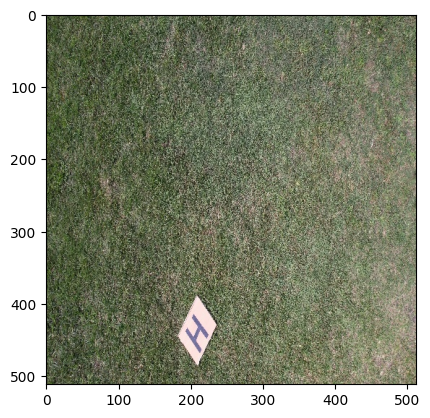

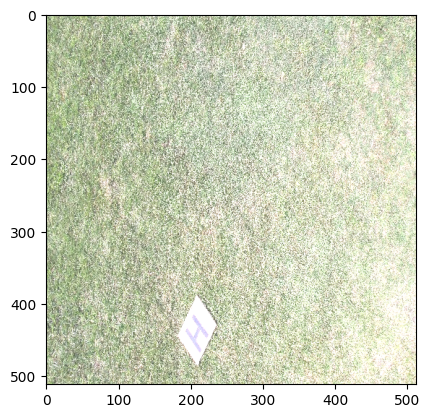

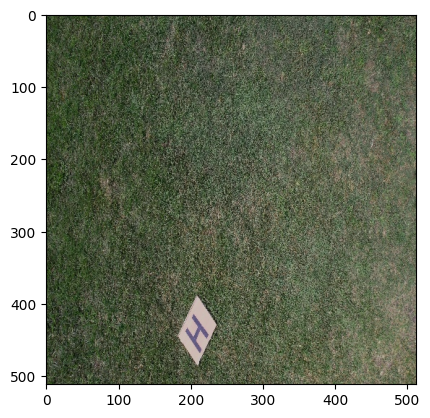

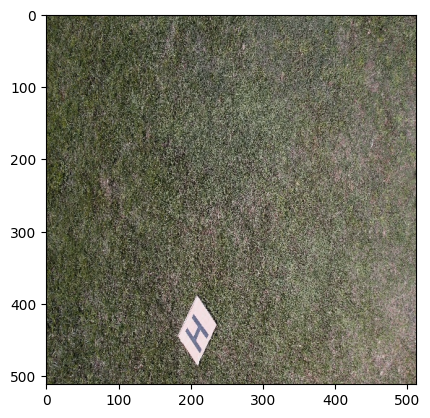

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1613: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


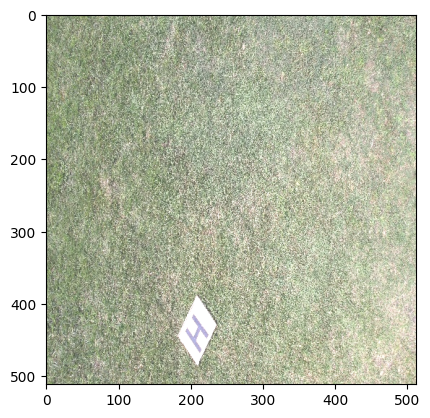

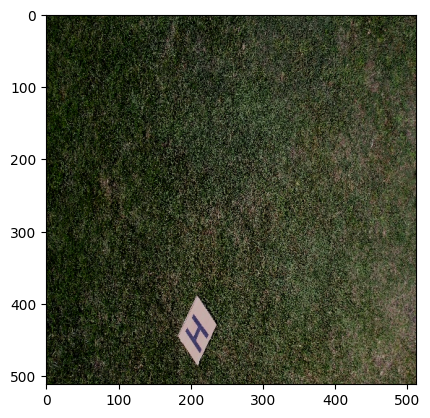

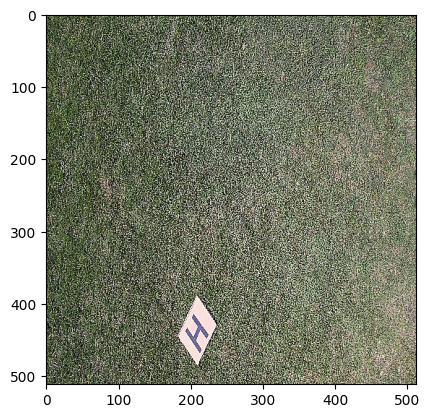

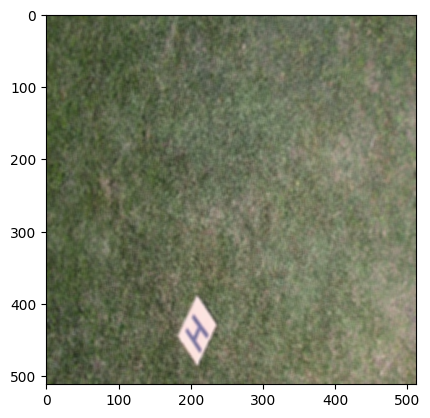

In [13]:
import albumentations as A

for i,j in tqdm(zip(imgs[1000:1001], anns[1000:1001])):
  
  img = cv2.imread(i)[:,:,::-1]
  plt.imshow(img)
  plt.show()

  transform = A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.3), contrast_limit=(-0.2, 0.3), 
                                         brightness_by_max=True, p=1.0, always_apply=True)
  HFlip = transform(image=img)
  plt.imshow(HFlip['image'])
  plt.show()

  transform = A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=True, p=1.0)
  CJ = transform(image=img)
  plt.imshow(CJ['image'])
  plt.show()

  transform = A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=1.0)
  HSV = transform(image=img)
  plt.imshow(HSV['image'])
  plt.show()

  transform = A.RandomBrightness(limit=(0.15, 0.3), always_apply=True, p=1.0)
  RB = transform(image=img)
  plt.imshow(RB['image'])
  plt.show()

  transform = A.RandomBrightness(limit=(-0.3, -0.15), always_apply=True, p=1.0)
  RB2 = transform(image=img)
  plt.imshow(RB2['image'])
  plt.show()

  transform = A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), always_apply=True, p=1.0)
  Sharpen = transform(image=img)
  plt.imshow(Sharpen['image'])
  plt.show()

  transform = A.RandomFog(fog_coef_lower=0.2, fog_coef_upper=0.35, alpha_coef=0.08, always_apply=True, p=1.0)
  RF = transform(image=img)
  plt.imshow(RF['image'])
  plt.show()

In [14]:
import albumentations as A
import shutil

for i,j in tqdm(zip(imgs, anns)):
  
  img = cv2.imread(i)[:,:,::-1]
  # plt.imshow(img)
  # plt.show()

  transform = A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.3), contrast_limit=(-0.2, 0.3), 
                                         brightness_by_max=True, p=1.0, always_apply=True)
  RBC = transform(image=img)
  # plt.imshow(RBC['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_RBC.'+i.split('.')[1], RBC['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_RBC.'+j.split('.')[1])

  transform = A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=True, p=1.0)
  CJ = transform(image=img)
  # plt.imshow(CJ['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_CJ.'+i.split('.')[1], CJ['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_CJ.'+j.split('.')[1])

  transform = A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=1.0)
  HSV = transform(image=img)
  # plt.imshow(HSV['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_HSV.'+i.split('.')[1], HSV['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_HSV.'+j.split('.')[1])

  transform = A.RandomBrightness(limit=(0.15, 0.3), always_apply=True, p=1.0)
  RB = transform(image=img)
  # plt.imshow(RB['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_RB.'+i.split('.')[1], RB['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_RB.'+j.split('.')[1])

  transform = A.RandomBrightness(limit=(-0.25, -0.15), always_apply=True, p=1.0)
  RB2 = transform(image=img)
  # plt.imshow(RB2['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_RB2.'+i.split('.')[1], RB2['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_RB2.'+j.split('.')[1])

  transform = A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), always_apply=True, p=1.0)
  Sharpen = transform(image=img)
  # plt.imshow(Sharpen['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_Sharpen.'+i.split('.')[1], Sharpen['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_Sharpen.'+j.split('.')[1])

  transform = A.RandomFog(fog_coef_lower=0.2, fog_coef_upper=0.35, alpha_coef=0.08, always_apply=True, p=1.0)
  RF = transform(image=img)
  # plt.imshow(RF['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_RF.'+i.split('.')[1], RF['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_RF.'+j.split('.')[1])  

0it [00:00, ?it/s]

In [15]:
len(glob('Images/*.jpg')), len(glob('Annotations/*.txt'))

(17920, 17920)

In [16]:
img = sorted(glob('Images/*.jpg'))
ann = sorted(glob('Annotations/*.txt'))

In [17]:
import sklearn
for i in tqdm(range(100000)):
  img, ann = sklearn.utils.shuffle(img, ann, random_state=i)
len(img), len(ann)

  0%|          | 0/100000 [00:00<?, ?it/s]

(17920, 17920)

In [18]:
img[24:29], ann[24:29]

(['Images/img1723_RBC.jpg',
  'Images/img1978_RB.jpg',
  'Images/img992_RB2.jpg',
  'Images/img78_RBC.jpg',
  'Images/img1536_RB2.jpg'],
 ['Annotations/img1723_RBC.txt',
  'Annotations/img1978_RB.txt',
  'Annotations/img992_RB2.txt',
  'Annotations/img78_RBC.txt',
  'Annotations/img1536_RB2.txt'])

In [19]:
17920*.7, 17920*.2, 17920*.1

(12544.0, 3584.0, 1792.0)

In [20]:
'''
Train :  12544
Val   :  1792  
Test  :  3584
'''
import shutil

for i in tqdm(range(17920)):

  if i < 12544:
    shutil.copy(img[i], '/content/Dataset/train/images/')
    shutil.copy(ann[i], '/content/Dataset/train/labels/')
  
  elif 12544 <= i <14336:
    shutil.copy(img[i], '/content/Dataset/val/images/')
    shutil.copy(ann[i], '/content/Dataset/val/labels/')
  
  elif i >= 14336:
    shutil.copy(img[i], '/content/Dataset/test/images/')
    shutil.copy(ann[i], '/content/Dataset/test/labels/')


  0%|          | 0/17920 [00:00<?, ?it/s]

In [21]:
len(glob('/content/Dataset/train/images/*.jpg')), len(glob('/content/Dataset/train/labels/*.txt')), sorted(glob('/content/Dataset/train/images/*.jpg'))[6:10], sorted(glob('/content/Dataset/train/labels/*.txt'))[6:10]

(12544,
 12544,
 ['/content/Dataset/train/images/img1000_Sharpen.jpg',
  '/content/Dataset/train/images/img1001_CJ.jpg',
  '/content/Dataset/train/images/img1001_RB2.jpg',
  '/content/Dataset/train/images/img1001_RBC.jpg'],
 ['/content/Dataset/train/labels/img1000_Sharpen.txt',
  '/content/Dataset/train/labels/img1001_CJ.txt',
  '/content/Dataset/train/labels/img1001_RB2.txt',
  '/content/Dataset/train/labels/img1001_RBC.txt'])

In [22]:
len(glob('/content/Dataset/val/images/*.jpg')), len(glob('/content/Dataset/val/labels/*.txt')), sorted(glob('/content/Dataset/val/images/*.jpg'))[6:10], sorted(glob('/content/Dataset/val/labels/*.txt'))[6:10]

(1792,
 1792,
 ['/content/Dataset/val/images/img1011_HSV.jpg',
  '/content/Dataset/val/images/img1012_RF.jpg',
  '/content/Dataset/val/images/img1015_RB2.jpg',
  '/content/Dataset/val/images/img1015_RF.jpg'],
 ['/content/Dataset/val/labels/img1011_HSV.txt',
  '/content/Dataset/val/labels/img1012_RF.txt',
  '/content/Dataset/val/labels/img1015_RB2.txt',
  '/content/Dataset/val/labels/img1015_RF.txt'])

In [23]:
len(glob('/content/Dataset/test/images/*.jpg')), len(glob('/content/Dataset/test/labels/*.txt')), sorted(glob('/content/Dataset/test/images/*.jpg'))[6:10], sorted(glob('/content/Dataset/test/labels/*.txt'))[6:10]

(3584,
 3584,
 ['/content/Dataset/test/images/img1002_Sharpen.jpg',
  '/content/Dataset/test/images/img1003.jpg',
  '/content/Dataset/test/images/img1003_CJ.jpg',
  '/content/Dataset/test/images/img1004_CJ.jpg'],
 ['/content/Dataset/test/labels/img1002_Sharpen.txt',
  '/content/Dataset/test/labels/img1003.txt',
  '/content/Dataset/test/labels/img1003_CJ.txt',
  '/content/Dataset/test/labels/img1004_CJ.txt'])

In [24]:
!rm -rf /content/Images
!rm -rf /content/Annotations
!rm /content/new_data_020223_class.xlsx

In [1]:
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!pip install --upgrade pip

Cloning into 'yolov7'...
remote: Enumerating objects: 1157, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1157 (delta 10), reused 14 (delta 7), pack-reused 1139
Receiving objects: 100% (1157/1157), 70.41 MiB | 21.86 MiB/s, done.
Resolving deltas: 100% (498/498), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -r requirements.txt
!sudo apt install -y zip htop screen libgl1-mesa-glx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
Suggested packages:
  strace byobu | screenie | iselect ncurses-term
The following NEW packages will be installed:
  htop libgl1-mesa-glx screen
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 663 kB of archives.
After this operation, 1,319 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 htop amd64 2.2.0-2build1 [80.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libgl1-mesa-glx amd64 21.2.6-0ubuntu0.1~20.04.2 [5,536 B]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 screen amd64 4.8.0-1ubuntu0.1 [577 kB]
Fetched 663 kB in 2s (328 kB/s)
debconf: unable t

In [3]:
%cd /content/yolov7/
!pwd

/content/yolov7
/content/yolov7


In [28]:
!rm -rf runs

In [29]:
!python train.py --batch-size 256 --data /content/data.yml --img 512 512 --cfg /content/yolov7-tiny.yml --weights '' --name yolov7 --hyp /content/hyp.scratch.tiny.yaml --epochs=30

2023-05-15 15:55:35.601040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 15:55:37.701327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='', cfg='/content/yolov7-tiny.yml', data='/content/data.yml', hyp='/content/hyp.scratch.tiny.yaml', epochs=30, batch_size=256, img_size=[512, 512], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='yolov7', exist_ok=False, quad=False, li

In [35]:
!python test.py --data /content/data.yml --img 512 --batch 256 --conf 0.3 --iou 0.5 --weights /content/yolov7/runs/train/yolov7/weights/best.pt --name yolov7_512_val

Namespace(weights=['/content/yolov7/runs/train/yolov7/weights/best.pt'], data='/content/data.yml', batch_size=256, img_size=512, conf_thres=0.3, iou_thres=0.5, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='yolov7_512_val', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 99348 parameters, 0 gradients, 0.3 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

val: Scanning '/content/Dataset/v

In [7]:
!pip install onnx onnx_graphsurgeon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
!python export.py --weights /content/best.pt --grid --end2end --simplify --topk-all 100 --iou-thres 0.5 --conf-thres 0.3 --img-size 512 512 --max-wh 512

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(weights='/content/best.pt', img_size=[512, 512], batch_size=1, dynamic=False, dynamic_batch=False, grid=True, end2end=True, max_wh=512, topk_all=100, iou_thres=0.5, conf_thres=0.3, device='cpu', simplify=True, include_nms=False, fp16=False, int8=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CPU

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 99348 parameters, 0 gradients, 0.3 GFLOPS

Starting TorchScript export with torch 2.0.0+cu118...
/content/yolov7/models/yolo.py:150: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the d

In [10]:
!pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.5 MB/s eta 0:00:00


In [68]:
from io import BytesIO
from PIL import Image

image = Image.open('/content/img4.jpg')
image = np.array(image).astype(np.float32).reshape(1, 3, 512, 512)

In [67]:
image.shape

(512, 512, 3)

In [82]:
import numpy as np
import onnxruntime as ort
import matplotlib.pyplot as plt
import cv2
from PIL import Image

img = cv2.imread("/content/img4.jpg")[:,:,::-1]/255.0
img = cv2.resize(img, (512, 512)).reshape(1, 3, 512, 512).astype(np.float32)
img = np.ascontiguousarray(img)
plt.imshow(img.reshape(512, 512, 3))
plt.show()
# img = cv2.imread("Downloads/PipeSeg/img1191.jpeg")[:,:,::-1]/255.0

onnx_model_path = "/content/best.onnx"
cuda = False
providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if cuda else ['CPUExecutionProvider']
sess = ort.InferenceSession(onnx_model_path)#, providers=providers)
inp, out = sess.get_inputs()[0], sess.get_outputs()[0]

# print("Prediction on an image from test dataset using Onnx Model:")
pred = sess.run([out.name], {inp.name: img})
# pred = np.where(pred>0.5, 0.0, 1.0)*255.0
# pred = np.dstack([pred, pred, pred])

# final = np.hstack([img, pred])
# plt.imshow(final, cmap='gray')
# plt.show()

# python3 Documents/Onnx/inference/onnx.py

print(pred, sess)

[array([], shape=(0, 7), dtype=float32)] <onnxruntime.capi.onnxruntime_inference_collection.InferenceSession object at 0x7f96271ef580>


In [70]:
pred

[array([[          0,          12,       11.75,          12,       12.25,           0,           1],
        [          0,     -33.676,     -69.637,      81.676,      117.64,           0,           1],
        [          0,      35.249,     -68.263,      140.75,      115.83,           0,           1],
        [          0,      68.098,     -50.617,       171.9,      98.455,           0,           1],
        [          0,      104.34,     -9.8625,      199.66,      57.677,           0,           1],
        [          0,      110.19,     -74.754,      225.81,      120.76,           0,           1],
        [          0,      144.13,     -55.357,      255.87,      103.11,           0,           1],
        [          0,      166.33,     -21.628,      265.68,      68.897,           0,           1],
        [          0,       232.2,     -37.521,       327.8,      82.281,           0,           1],
        [          0,      295.03,     -63.056,      392.97,      110.85,           0,     

In [73]:
ori_images = [image.copy()]

for i,(batch_id,x0,y0,x1,y1,cls_id,score) in enumerate(pred[0]):
    image = ori_images[int(batch_id)]
    box = np.array([x0,y0,x1,y1])
    # box -= np.array(dwdh*2)
    # box /= ratio
    box = box.round().astype(np.int32).tolist()
    cls_id = int(cls_id)
    score = round(float(score),3)
    name = 'H'#names[cls_id]
    color = (255,0,0)#colors[name]
    name += ' '+str(score)
    cv2.rectangle(image,box[:2],box[2:],color,2)
    # cv2.putText(image,name,(box[0], box[1] - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)  

Image.fromarray(ori_images[0])

TypeError: ignored

In [83]:
plt.imshow(ori_images[0].reshape(512, 512, 3)*255)
plt.show()

cv2.imwrite('sdfsd.jpg', ori_images[0].reshape(512, 512, 3))

True

In [84]:
ori_images[0].shape, pwd

NameError: ignored

In [ ]:
help(sess)

In [27]:
from models.experimental import attempt_load
import torch

m = attempt_load('/content/best.pt', torch.device('cpu'))

Fusing layers... 
IDetect.fuse


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
m

In [ ]:
aa = m(torch.from_numpy(img))
aa

In [47]:
type(aa),aa[0].shape

(tuple, torch.Size([1, 16128, 6]))

In [60]:
aaa = []
for i in range(16128):
  # print(aa[0][0][i][-1])
  if aa[0][0][i][-1] >= 0.99:
    aaa.append(aa[0][0][i])

In [61]:
len(aaa)

2636

In [ ]:
aaa

In [63]:
from models.experimental import attempt_load
from utils.general import non_max_suppression

In [97]:
pwd

'/content'

In [86]:
img.shape

(1, 3, 512, 512)

In [98]:
import cv2
# from imread_from_url import imread_from_url

from yolov7 import YOLOv7

# Initialize yolov7 object detector
model_path = "content/best.onnx"
yolov7_detector = YOLOv7(model_path, conf_thres=0.2, iou_thres=0.3)

# Read image
# img_url = "https://live.staticflickr.com/13/19041780_d6fd803de0_3k.jpg"
# img = imread_from_url(img_url)

# Detect Objects
boxes, scores, class_ids = yolov7_detector(img)

# Draw detections
combined_img = yolov7_detector.draw_detections(img)
cv2.namedWindow("Detected Objects", cv2.WINDOW_NORMAL)
cv2.imshow("Detected Objects", combined_img)
cv2.imwrite("fafa.jpg", combined_img)
cv2.waitKey(0)

ImportError: ignored